In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import sys
sys.path.append('../data/tecantaloupe/')

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

import seaborn as sns
from utils import *
import os

matplotlib.rcParams.update({'font.size': 30})

In [2]:
def getExcitationScan(filename):
    import numpy as np
    file = open(filename, 'r')
    graph = [line.split() for line in file if line[0].isdigit()]
    file.close()
    return(np.array([float(i[0]) for i in graph]),np.array([float(i[1]) for i in graph]))

In [3]:
# toPlot = [
#     ['Acetone_BCA_Se_001.bip','bCA (+)'],
#     ['Acetone_DAB2_SEDC_Se_001.bip','Dab2'],
#     ['bufferBlank_02_Se_001.bip','Buffer (-)'],
#     ['bufferBlank_03_Se_001.bip','Buffer (-)'],
#     ['BCA_acetone.bip','bCA (+)'],
#     ['DAB2_acetone_3.bip','Dab2'],
#     ['DAB2_DC_his_acetone.bip','Dab2 C351A'],
#     ['DAB2_DC_strep_acetone.bip','Dab2 C351A'],
#     ['DAB2_DD_strep_acetone_2.bip','Dab2 D353A'],
#     ['DAB2_DD_strep_acetone.bip','Dab2 D353A'],
# ]

names2traces = {
    'bCA (+)': ['Acetone_BCA_Se_001.bip', 'BCA_acetone.bip'],
    'Buffer (-)': ['bufferBlank_02_Se_001.bip', 'bufferBlank_03_Se_001.bip'],
    'DAB2': ['DAB2_acetone_3.bip', 'Acetone_DAB2_SEDC_Se_001.bip'],
    'DAB2 C351A': ['DAB2_DC_his_acetone.bip', 'DAB2_DC_strep_acetone.bip'],
    'DAB2 D353A': ['DAB2_DD_strep_acetone_2.bip', 'DAB2_DD_strep_acetone.bip'],
}

names2colors = {
    'bCA (+)': qual_palette[9],
    'Buffer (-)': qual_palette[7],
    'DAB2': qual_palette[1], 
    'DAB2 C351A': qual_palette[5],
    'DAB2 D353A': qual_palette[3], 
}

nameorder = ['Buffer (-)', 'DAB2 C351A', 'DAB2 D353A', 'DAB2', 'bCA (+)']

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


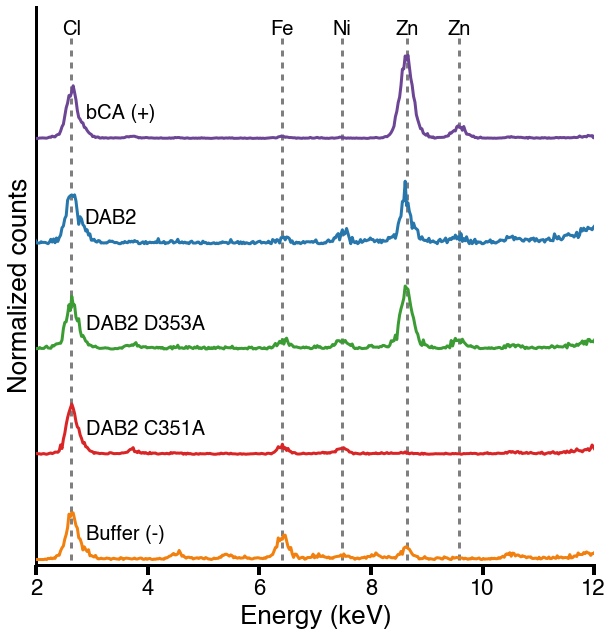

In [4]:
fig,ax = plt.subplots(figsize=(10,10), frameon=False)

fontsize=20

fileLoc = '../data/zincBindingFilesForPaper/'
data_df = pd.DataFrame(columns=['x'],dtype='float')

for i, name in enumerate(nameorder):
    for fname in names2traces[name]:
        full_fname = fileLoc + fname
    
        x,y=getExcitationScan(full_fname)
        y=y/max(y[(x>2000) & (x<3500)])
        temp_df = pd.DataFrame(columns=['x',fname],dtype='float')
        temp_df['x'] = x
        temp_df[fname] = y
        temp_df.loc[-1] = ['name', name]
        data_df = data_df.merge(temp_df, on='x',how='outer')
    
    
data_df = data_df.set_index('x').transpose()
for column in data_df:
    if column != 'name':
        data_df[column] = data_df[column].astype(float)
        
data_df = data_df.groupby('name',axis=0).mean().transpose()[nameorder]
#     return(data_df)
x=data_df.index
for i, col in enumerate(data_df.columns):
    y = data_df[col]+i*2
    name = data_df[col].name
    c = names2colors[name]
    ax.plot(x, y, zorder=5, lw=3, color=c)
    plt.text(2900,(i*2)+0.3,col,ha='left',va='bottom',fontsize=fontsize)

top=len(data_df.columns)*2+0.5
plt.xlim(2000,12000)
locs,labels = plt.xticks()
ticks=[str(int(x/1000)) for x in locs]
plt.xticks(locs, ticks, fontsize=22)
plt.ylim(-0.1,top)


#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
plt.vlines([2622.39,6403.84,7478.15,8638.86,9572.0],0,top-0.5,zorder=0 ,alpha=0.5,linestyles='--',lw=3)
#     plt.text(2622.39,top-0.6,'Cl Ka1',ha='center',va='bottom')
#     plt.text(7478.15,top-0.6,'Ni Ka1',ha='center',va='bottom')
#     plt.text(8638.86,top-0.6,'Zn Ka1',ha='center',va='bottom')
#     plt.text(9572.0,top-0.6,'Zn Kb1',ha='center',va='bottom')
#     plt.text(6403.84,top-0.6,'Fe Ka1',ha='center',va='bottom')
plt.text(2622.39,top-0.6,'Cl',ha='center',va='bottom',fontsize=fontsize)
plt.text(7478.15,top-0.6,'Ni',ha='center',va='bottom',fontsize=fontsize)
plt.text(8638.86,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(9572.0,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(6403.84,top-0.6,'Fe',ha='center',va='bottom',fontsize=fontsize)
#     plt.legend(loc=[1.05,0.4])
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized counts')
plt.yticks([])
# plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4D.eps', format='eps', bbox_inches='tight')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


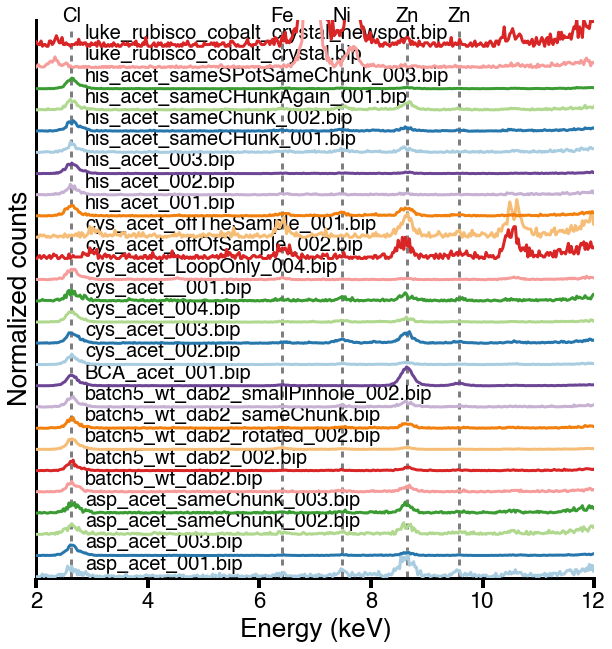

In [25]:
fig,ax = plt.subplots(figsize=(10,10), frameon=False)

fontsize=20

fileLoc = '../data/zincBindingFilesForPaper/2018_12_05/'
files = os.listdir(fileLoc)

for i, name in enumerate(files):
    full_fname = fileLoc+name
#     print(name)
    x,y=getExcitationScan(full_fname)
    y=y/max(y[(x>2000) & (x<3500)])
    y = y+i*2
    ax.plot(x, y, zorder=5, lw=3, color=qual_palette[i%len(qual_palette)])
    plt.text(2900,(i*2)+0.3,name,ha='left',va='bottom',fontsize=fontsize)

top=len(files)*2+0.5
plt.xlim(2000,12000)
locs,labels = plt.xticks()
ticks=[str(int(x/1000)) for x in locs]
plt.xticks(locs, ticks, fontsize=22)
plt.ylim(-0.1,top)


#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
plt.vlines([2622.39,6403.84,7478.15,8638.86,9572.0],0,top-0.5,zorder=0 ,alpha=0.5,linestyles='--',lw=3)
#     plt.text(2622.39,top-0.6,'Cl Ka1',ha='center',va='bottom')
#     plt.text(7478.15,top-0.6,'Ni Ka1',ha='center',va='bottom')
#     plt.text(8638.86,top-0.6,'Zn Ka1',ha='center',va='bottom')
#     plt.text(9572.0,top-0.6,'Zn Kb1',ha='center',va='bottom')
#     plt.text(6403.84,top-0.6,'Fe Ka1',ha='center',va='bottom')
plt.text(2622.39,top-0.6,'Cl',ha='center',va='bottom',fontsize=fontsize)
plt.text(7478.15,top-0.6,'Ni',ha='center',va='bottom',fontsize=fontsize)
plt.text(8638.86,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(9572.0,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(6403.84,top-0.6,'Fe',ha='center',va='bottom',fontsize=fontsize)
#     plt.legend(loc=[1.05,0.4])
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized counts')
plt.yticks([])
# plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4D.eps', format='eps', bbox_inches='tight')

plt.show()

In [23]:
fileLoc = '../data/zincBindingFilesForPaper/toPlot/'
files = os.listdir(fileLoc)
files

['Acetone_DAB2_SEDC_Se_001.bip',
 'asp_acet_001.bip',
 'asp_acet_003.bip',
 'asp_acet_sameChunk_002.bip',
 'asp_acet_sameChunk_003.bip',
 'batch5_wt_dab2.bip',
 'batch5_wt_dab2_002.bip',
 'batch5_wt_dab2_rotated_002.bip',
 'batch5_wt_dab2_sameChunk.bip',
 'batch5_wt_dab2_smallPinhole_002.bip',
 'BCA_acet_001.bip',
 'cys_acet_002.bip',
 'cys_acet_003.bip',
 'cys_acet_004.bip',
 'cys_acet__001.bip',
 'cys_acet_LoopOnly_004.bip',
 'cys_acet_offOfSample_002.bip',
 'cys_acet_offTheSample_001.bip',
 'DAB2_acetone_3.bip',
 'his_acet_001.bip',
 'his_acet_002.bip',
 'his_acet_003.bip',
 'his_acet_sameCHunk_001.bip',
 'his_acet_sameChunk_002.bip',
 'his_acet_sameCHunkAgain_001.bip',
 'his_acet_sameSPotSameChunk_003.bip',
 'luke_rubisco_cobalt_crystal.bip',
 'luke_rubisco_cobalt_crystal_newspot.bip']

In [30]:
fileLoc = '../data/zincBindingFilesForPaper/toPlot/'
files = os.listdir(fileLoc)
names2traces = {
    'bCA (+)': [x for x in files if 'BCA' in x ],
    'empty loop (-)': [x for x in files if 'LoopOnly' in x ],
    'rubisco (-)': [x for x in files if 'rubisco' in x ],
    'DAB2': [x for x in files if ('DAB2' in x)],#|(('wt' in x)&('small' not in x)) ],
    'DAB2 C351A': [x for x in files if ('cys' in x)&('Loop' not in x)&('off' not in x) ],
    'DAB2 D353A': [x for x in files if 'asp' in x ],
    'DAB2 His1': [x for x in files if 'his' in x ],
}

names2colors = {key:qual_palette[i%len(qual_palette)] for i,key in enumerate(names2traces.keys())}

nameorder = ['empty loop (-)','rubisco (-)','DAB2 His1','DAB2 C351A', 'DAB2 D353A', 'DAB2', 'bCA (+)']
names2traces['DAB2']

['Acetone_DAB2_SEDC_Se_001.bip', 'DAB2_acetone_3.bip']

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


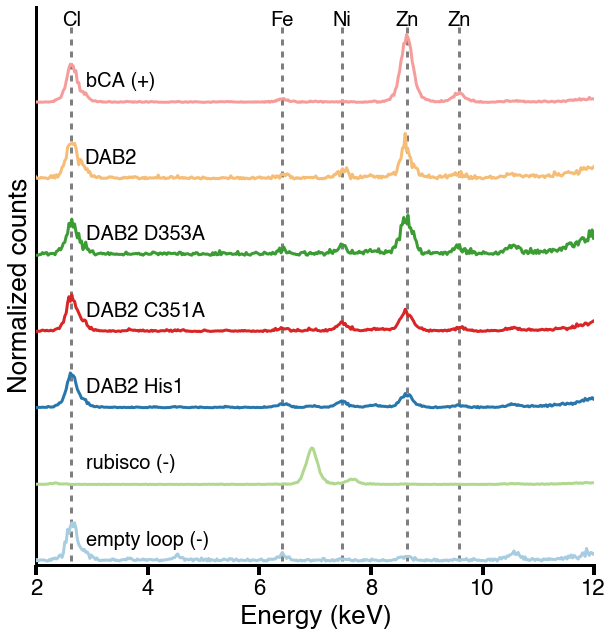

In [31]:
fig,ax = plt.subplots(figsize=(10,10), frameon=False)

fontsize=20

# fileLoc = '../data/zincBindingFilesForPaper/'
data_df = pd.DataFrame(columns=['x'],dtype='float')

for i, name in enumerate(nameorder):
    for fname in names2traces[name]:
        full_fname = fileLoc + fname
    
        x,y=getExcitationScan(full_fname)
        if name == 'rubisco (-)':
            y=y/max(y[(x>6000) & (x<8500)])
        else:
            y=y/max(y[(x>2000) & (x<3500)])
        temp_df = pd.DataFrame(columns=['x',fname],dtype='float')
        temp_df['x'] = x
        temp_df[fname] = y
        temp_df.loc[-1] = ['name', name]
        data_df = data_df.merge(temp_df, on='x',how='outer')
    
    
data_df = data_df.set_index('x').transpose()
for column in data_df:
    if column != 'name':
        data_df[column] = data_df[column].astype(float)
        
data_df = data_df.groupby('name',axis=0).mean().transpose()[nameorder]
#     return(data_df)
x=data_df.index
for i, col in enumerate(data_df.columns):
    y = data_df[col]+i*2
    name = data_df[col].name
    c = names2colors[name]
    ax.plot(x, y, zorder=5, lw=3, color=c)
    plt.text(2900,(i*2)+0.3,col,ha='left',va='bottom',fontsize=fontsize)

top=len(data_df.columns)*2+0.5
plt.xlim(2000,12000)
locs,labels = plt.xticks()
ticks=[str(int(x/1000)) for x in locs]
plt.xticks(locs, ticks, fontsize=22)
plt.ylim(-0.1,top)


#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
plt.vlines([2622.39,6403.84,7478.15,8638.86,9572.0],0,top-0.5,zorder=0 ,alpha=0.5,linestyles='--',lw=3)
#     plt.text(2622.39,top-0.6,'Cl Ka1',ha='center',va='bottom')
#     plt.text(7478.15,top-0.6,'Ni Ka1',ha='center',va='bottom')
#     plt.text(8638.86,top-0.6,'Zn Ka1',ha='center',va='bottom')
#     plt.text(9572.0,top-0.6,'Zn Kb1',ha='center',va='bottom')
#     plt.text(6403.84,top-0.6,'Fe Ka1',ha='center',va='bottom')
plt.text(2622.39,top-0.6,'Cl',ha='center',va='bottom',fontsize=fontsize)
plt.text(7478.15,top-0.6,'Ni',ha='center',va='bottom',fontsize=fontsize)
plt.text(8638.86,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(9572.0,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(6403.84,top-0.6,'Fe',ha='center',va='bottom',fontsize=fontsize)
#     plt.legend(loc=[1.05,0.4])
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized counts')
plt.yticks([])
# plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4D.eps', format='eps', bbox_inches='tight')

plt.show()

In [34]:
fileLoc = '../data/zincBindingFilesForPaper/toPlot/'
files = os.listdir(fileLoc)
names2traces = {
    'bCA (+)': [x for x in files if 'BCA' in x ],
    'empty loop (-)': [x for x in files if 'LoopOnly' in x ],
    'rubisco (-)': [x for x in files if 'rubisco' in x ],
    'DAB2': [x for x in files if (('wt' in x)&('small' not in x)) ],
    'DAB2 C351A': [x for x in files if ('cys' in x)&('Loop' not in x)&('off' not in x) ],
    'DAB2 D353A': [x for x in files if 'asp' in x ],
    'DAB2 His1': [x for x in files if 'his' in x ],
}

names2colors = {key:qual_palette[i%len(qual_palette)] for i,key in enumerate(names2traces.keys())}

nameorder = ['empty loop (-)','rubisco (-)','DAB2 His1','DAB2 C351A', 'DAB2 D353A', 'DAB2', 'bCA (+)']
names2traces['DAB2']

['batch5_wt_dab2.bip',
 'batch5_wt_dab2_002.bip',
 'batch5_wt_dab2_rotated_002.bip',
 'batch5_wt_dab2_sameChunk.bip']

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


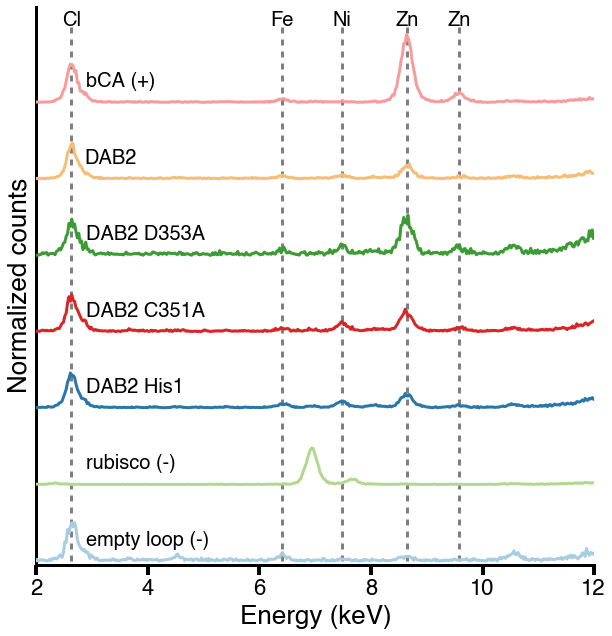

In [35]:
fig,ax = plt.subplots(figsize=(10,10), frameon=False)

fontsize=20

# fileLoc = '../data/zincBindingFilesForPaper/'
data_df = pd.DataFrame(columns=['x'],dtype='float')

for i, name in enumerate(nameorder):
    for fname in names2traces[name]:
        full_fname = fileLoc + fname
    
        x,y=getExcitationScan(full_fname)
        if name == 'rubisco (-)':
            y=y/max(y[(x>6000) & (x<8500)])
        else:
            y=y/max(y[(x>2000) & (x<3500)])
        temp_df = pd.DataFrame(columns=['x',fname],dtype='float')
        temp_df['x'] = x
        temp_df[fname] = y
        temp_df.loc[-1] = ['name', name]
        data_df = data_df.merge(temp_df, on='x',how='outer')
    
    
data_df = data_df.set_index('x').transpose()
for column in data_df:
    if column != 'name':
        data_df[column] = data_df[column].astype(float)
        
data_df = data_df.groupby('name',axis=0).mean().transpose()[nameorder]
#     return(data_df)
x=data_df.index
for i, col in enumerate(data_df.columns):
    y = data_df[col]+i*2
    name = data_df[col].name
    c = names2colors[name]
    ax.plot(x, y, zorder=5, lw=3, color=c)
    plt.text(2900,(i*2)+0.3,col,ha='left',va='bottom',fontsize=fontsize)

top=len(data_df.columns)*2+0.5
plt.xlim(2000,12000)
locs,labels = plt.xticks()
ticks=[str(int(x/1000)) for x in locs]
plt.xticks(locs, ticks, fontsize=22)
plt.ylim(-0.1,top)


#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
plt.vlines([2622.39,6403.84,7478.15,8638.86,9572.0],0,top-0.5,zorder=0 ,alpha=0.5,linestyles='--',lw=3)
#     plt.text(2622.39,top-0.6,'Cl Ka1',ha='center',va='bottom')
#     plt.text(7478.15,top-0.6,'Ni Ka1',ha='center',va='bottom')
#     plt.text(8638.86,top-0.6,'Zn Ka1',ha='center',va='bottom')
#     plt.text(9572.0,top-0.6,'Zn Kb1',ha='center',va='bottom')
#     plt.text(6403.84,top-0.6,'Fe Ka1',ha='center',va='bottom')
plt.text(2622.39,top-0.6,'Cl',ha='center',va='bottom',fontsize=fontsize)
plt.text(7478.15,top-0.6,'Ni',ha='center',va='bottom',fontsize=fontsize)
plt.text(8638.86,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(9572.0,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(6403.84,top-0.6,'Fe',ha='center',va='bottom',fontsize=fontsize)
#     plt.legend(loc=[1.05,0.4])
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized counts')
plt.yticks([])
# plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4D.eps', format='eps', bbox_inches='tight')

plt.show()